In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.covariance import graphical_lasso, empirical_covariance
from graph import draw_graph, Node, get_graph
from data import get_nodes, get_scaled_data

In [14]:
nodes, nodes_ids = get_nodes()
df = get_scaled_data()

In [4]:
df.head()

,date,gracia,pr,eixample,prat,montcada,ciutadella,hebron,badalona
0,2017-06-01 01:00:00,-0.813551,-1.164412,-0.337098,-0.693782,-0.533819,-0.172147,-1.327164,-0.306301
1,2017-06-01 02:00:00,-1.400495,-1.558343,-0.678212,-0.724890,-0.812994,-1.458819,-0.434462,-1.046763
2,2017-06-01 03:00:00,-1.626243,-1.558343,-1.555362,-0.880428,-0.999111,-1.648035,-0.648710,-1.282364
3,2017-06-01 04:00:00,-1.535944,-1.046232,-1.311709,-0.849321,-1.030131,-1.648035,-1.327164,-1.585280
4,2017-06-01 05:00:00,-0.316907,-0.809873,0.052746,-1.067074,-1.185228,-1.723722,-1.327164,-1.416994


# https://scikit-learn.org/stable/modules/covariance.html

In [5]:
numerical_columns = df.columns[1:]
S = empirical_covariance(df[numerical_columns])

In [6]:
S

array([[1.        , 0.816045  , 0.91928002, 0.70323741, 0.75313043,
        0.75212655, 0.81007081, 0.74767966],
       [0.816045  , 1.        , 0.77200543, 0.77731915, 0.81415208,
        0.73760516, 0.86970529, 0.77828468],
       [0.91928002, 0.77200543, 1.        , 0.66865991, 0.70350436,
        0.7236974 , 0.75029329, 0.70767546],
       [0.70323741, 0.77731915, 0.66865991, 1.        , 0.88380301,
        0.70943551, 0.81423062, 0.83018417],
       [0.75313043, 0.81415208, 0.70350436, 0.88380301, 1.        ,
        0.76285091, 0.86339703, 0.8881948 ],
       [0.75212655, 0.73760516, 0.7236974 , 0.70943551, 0.76285091,
        1.        , 0.71048483, 0.78677069],
       [0.81007081, 0.86970529, 0.75029329, 0.81423062, 0.86339703,
        0.71048483, 1.        , 0.82380973],
       [0.74767966, 0.77828468, 0.70767546, 0.83018417, 0.8881948 ,
        0.78677069, 0.82380973, 1.        ]])

In [7]:
# aixo retorne la estiamted cov i la precission matrix (no la necessito)
W, _ = graphical_lasso(S, alpha=0.0000000003, max_iter=1000)

In [21]:
# set to zero
for i in range(W.shape[0]):
    W[i][i] = 0

In [27]:
# TODO: threshold
THRESHOLD = 0.8
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if W[i][j] < THRESHOLD:
            W[i][j] = 0

W is the weight adjacency matrix. See that the diagonal is all ones.

In [28]:
W

array([[0.        , 0.816045  , 0.91928002, 0.        , 0.        ,
        0.        , 0.81007081, 0.        ],
       [0.816045  , 0.        , 0.        , 0.        , 0.81415208,
        0.        , 0.86970529, 0.        ],
       [0.91928002, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.88380301,
        0.        , 0.81423062, 0.83018417],
       [0.        , 0.81415208, 0.        , 0.88380301, 0.        ,
        0.        , 0.86339703, 0.8881948 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.81007081, 0.86970529, 0.        , 0.81423062, 0.86339703,
        0.        , 0.        , 0.82380973],
       [0.        , 0.        , 0.        , 0.83018417, 0.8881948 ,
        0.        , 0.82380973, 0.        ]])

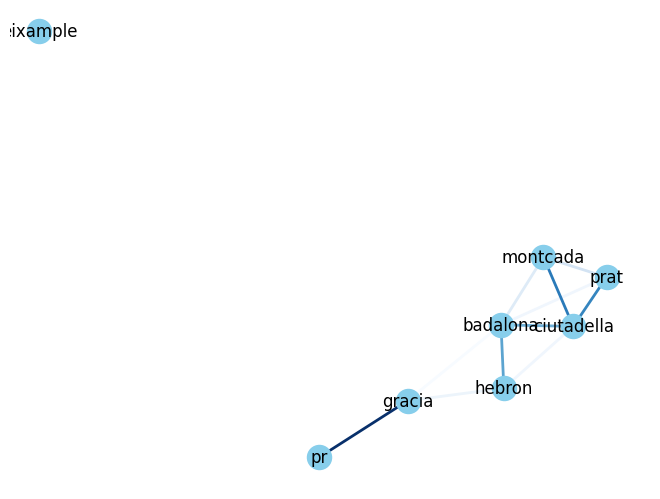

In [29]:
G = get_graph(W, nodes_ids)
draw_graph(G)